In [1]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')
    %cd /content/drive/MyDrive/polar-lows-detection-forecasting-deep-learning/additional_notebooks/

In [2]:
import sys
from pathlib import Path

root = Path('..').resolve()
sys.path.insert(0, str(root))

from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

In [3]:
def show_image(image, title=""):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [4]:
def compare_images(image1, image2, title1="Original Image", title2="Transformed Image"):
    plt.figure(figsize=(12, 6))

    # Left image
    plt.subplot(1, 2, 1)
    plt.imshow(image1)
    plt.title(title1)
    plt.axis('off')

    # Right image
    plt.subplot(1, 2, 2)
    plt.imshow(image2)
    plt.title(title2)
    plt.axis('off')

    plt.show()

Image resolution: 800x800


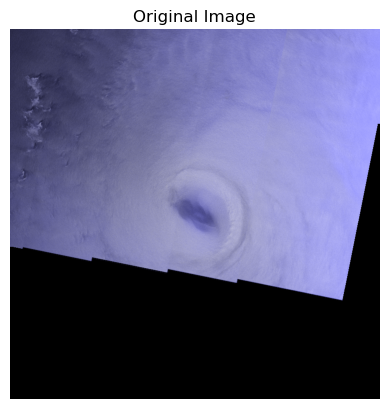

In [6]:
image = Image.open(root / 'data/train/pos/0aa613_20181003T134110_20181003T134210_mos_rgb.png')
width, height = image.size
print(f"Image resolution: {width}x{height}")

# Show original image
show_image(image, "Original Image")

In [7]:
# Define individual transformations
random_affine = transforms.RandomAffine(degrees=45, translate=(0.35, 0.35), fill=0)
random_horizontal_flip = transforms.RandomHorizontalFlip(p=1.0)  # Always apply for visualization
random_vertical_flip = transforms.RandomVerticalFlip(p=1.0)  # Always apply for visualization
random_resized_crop = transforms.RandomResizedCrop(size=(512, 512), scale=(0.85, 1.15))
center_crop = transforms.CenterCrop(size=(512, 512))
resize = transforms.Resize((299, 299))

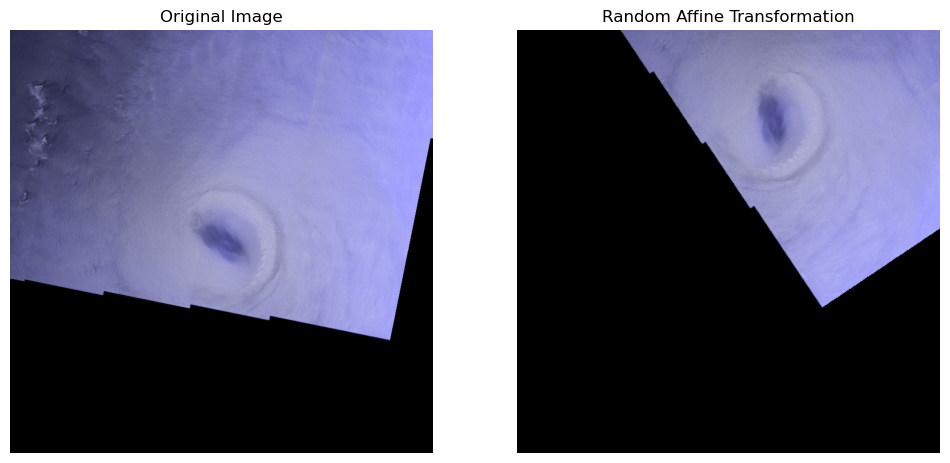

In [17]:
# Random Affine Transformation
transformed_image = random_affine(image)
compare_images(image, transformed_image, "Original Image", "Random Affine Transformation")

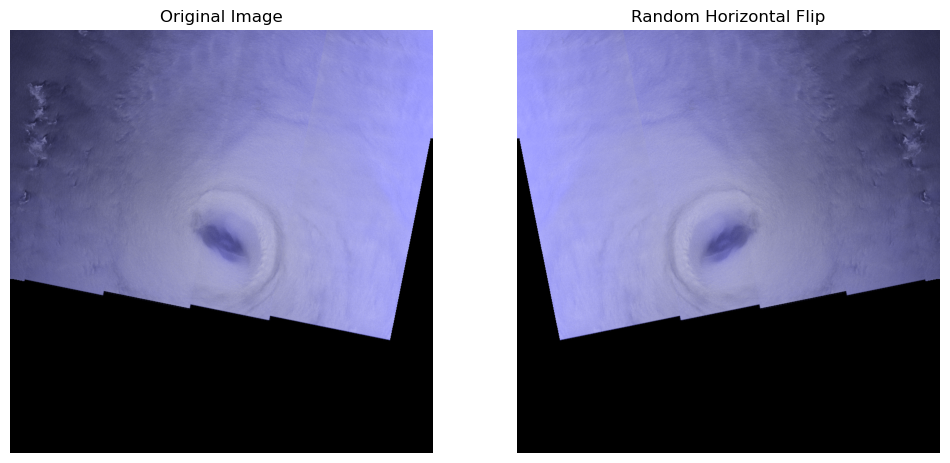

In [9]:
# Random Horizontal Flip
transformed_image = random_horizontal_flip(image)
compare_images(image, transformed_image, "Original Image", "Random Horizontal Flip")

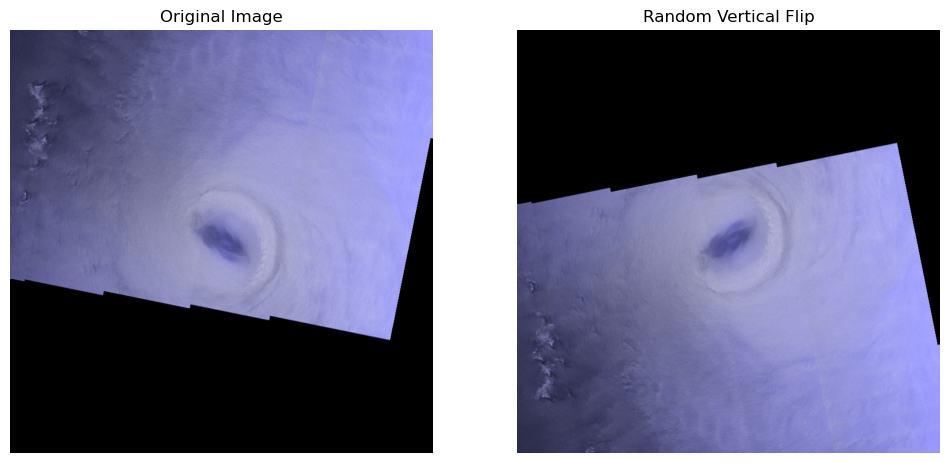

In [10]:
# Random Vertical Flip
transformed_image = random_vertical_flip(image)
compare_images(image, transformed_image, "Original Image", "Random Vertical Flip")

Transformed Image resolution: 512x512


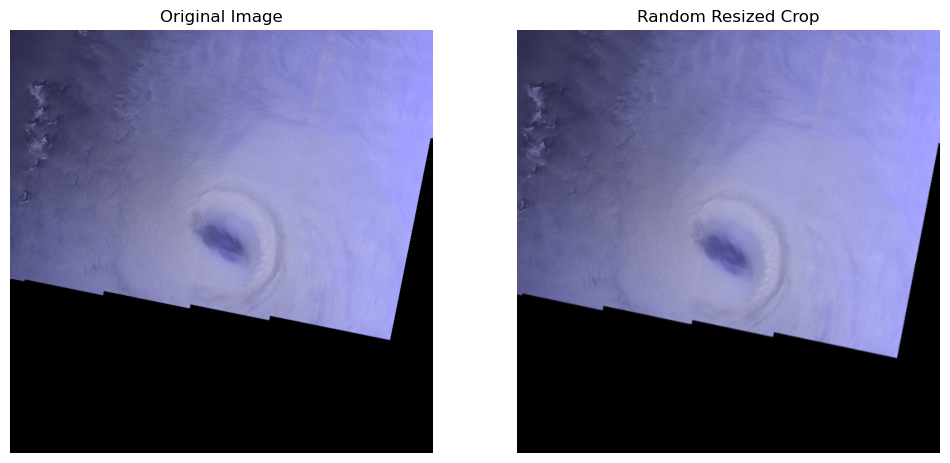

In [11]:
# Random Resized Crop
transformed_image = random_resized_crop(image)
width, height = transformed_image.size
print(f"Transformed Image resolution: {width}x{height}")
compare_images(image, transformed_image, "Original Image", "Random Resized Crop")

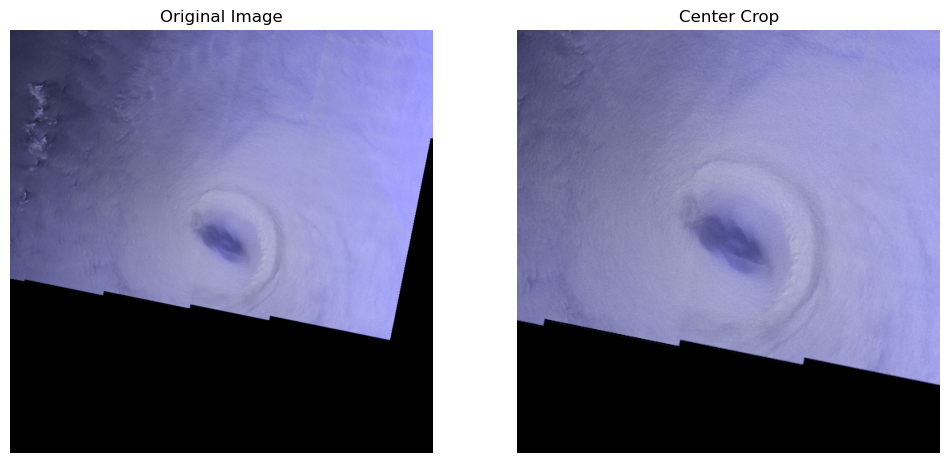

In [12]:
# Center Crop
transformed_image = center_crop(image)
compare_images(image, transformed_image, "Original Image", "Center Crop")

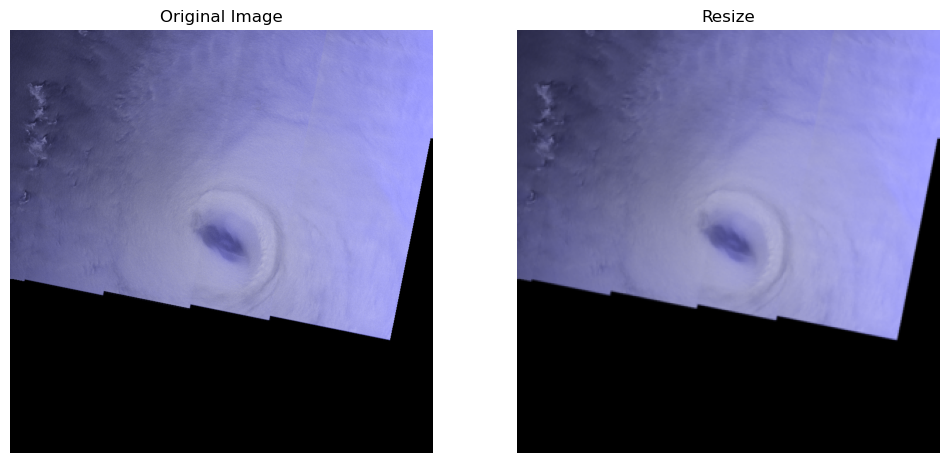

In [13]:
# Resize
transformed_image = resize(image)
compare_images(image, transformed_image, "Original Image", "Resize")